## **선형대수**

**-PCA와 SVD의 차이점 비교-**

의용생체공학과 201738410 김예슬

# **차원 축소**

: 데이터 차원이 크면 학습 속도가 느릴 뿐만 아니라 성능 또한 좋지 않을 가능성이 큼.

*- 축소해야하는 이유* 

: 계산 비용 절감

: 노이즈 제거

: 도출된 결과 이해

**차원 축소를 위한 접근 방법**

- projection, manifold learning




# **SVD(Singular Value Decomposition; 특이값 분해)**

1. 특이값분해는 m x n 크기의 데이터 행렬 A을 아래의 식과 같이 분해는 하는 것
>- A=UΣV^T

>> 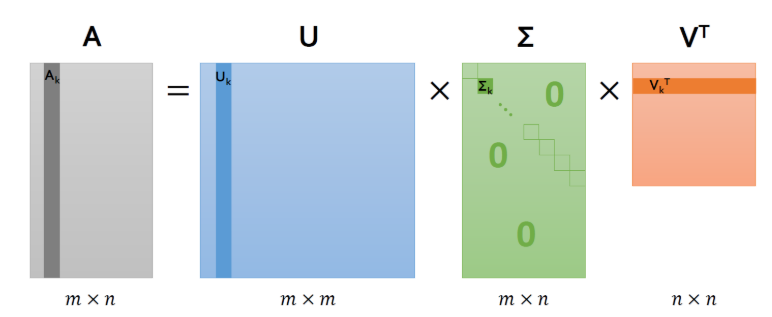

- 행렬 U와 V에 속한 열벡터는 특이벡터(singular vector)로 불리고, 모든 특이벡터는 서로 직교하는 성질을 가짐.

>> 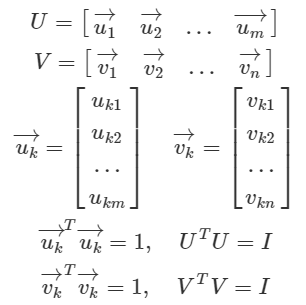

- 행렬 Σ의 특이값은 모두 0보다 크거나 같으며 내림차순으로 정렬

- 행렬 Σ의 k번째 대각원소에 해당하는 특이값 Σk는 행렬 AA^T의 k번째 고유값에 제곱근을 취한 값과 같음.

>> 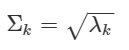

2. 특이값 분해를 PCA와 비교해보기 위해 행렬 A를 제곱

>> 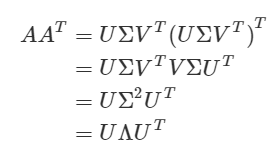

>> 대각성분이 행렬 A의 특이값이고 나머지 성분이 0인 행렬 Σ에 주의

- Σ 는 대각행렬(diagonal matrix): 대각행렬의 거듭제곱은 대각원소들만 거듭제곱을 해준 결과와 같음.

- Σ 의 제곱은 각 대각원소, 즉 행렬 A의 특이값들을 제곱해준 값과 똑같음. 

- 행렬 A의 특이값은 AA^T의 고유값에 제곱근을 한 값과 동일하므로, Σ을 제곱한 행렬은 행렬 AA^T의 고유값으로 이뤄진 행렬 Λ가 됨.

- 위에 정의된 결과가 주성분 분석의 결과와 같음.

3. 다시 정리

>> 정방행렬이 아닌 A 행렬 (m x n) 에 대해

>> U:AAT의 고유벡터 (m x m)

>> Σ:A의 특이값들을 대각항으로 가지는 대각행렬 (m x n)

>> 특이값(singular value)은 AAT와ATA의 고유값의 제곱근

>>V:ATA의 고유벡터 (n x n)

4. Reduced SVD와 행렬근사, 데이터 압축

> 1) full SVD: 행렬 m×n 행렬 A를 SVD로 분해하는 것

>> 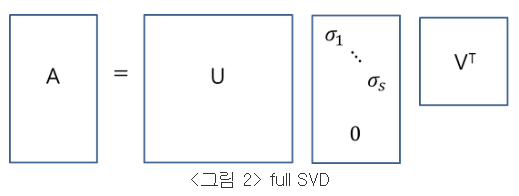

> 2) reduced SVD를 하는게 일반적

> - thin SVD: <그림 3>은 Σ에서 대각파트가 아닌 0으로 구성된 부분을 없애고 U에서는 이에 대응되는 열벡터들를 제거한 형태

>> 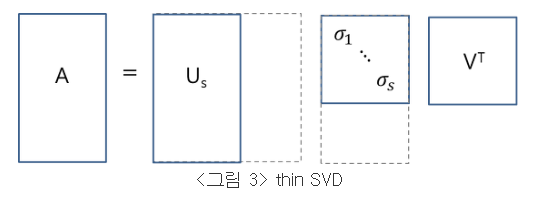

> - compact SVD: <그림 4>는 비대각 원소들뿐만 아니라 0인 singular value들까지 모두 제거한 형태

>> 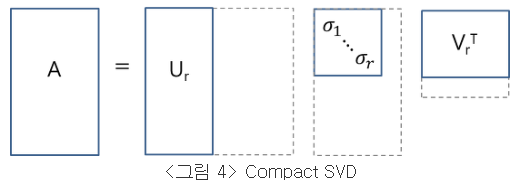

> thin SVD, compact SVD는 A가 원래의 A와 동일한 행렬이 나옴

> - truncated SVD: <그림 5>의 경우는 0이 아닌 singular value까지 제거한 형태

>> 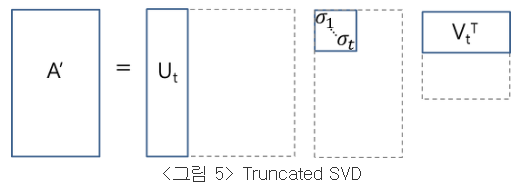

> 이 경우에는 원래의 A가 보존되지 않고 A에 대한 근사행렬 A'이 나옴

>> - eigenvalue-decomposition에서는 공분산 행렬을 메모리상에 가지고 있어야하는 반면 SVD는 공분산 행렬을 따로 메모리에 저장할 필요가 없으므로 효율적이기 때문이다.


# **특이값 분해 계산**

In [0]:
import numpy as np

from numpy.linalg import svd

A = np.array([[3, -1], [1, 3], [1, 1]])
U, S, VT = svd(A)

In [0]:
U

array([[-4.08248290e-01,  8.94427191e-01, -1.82574186e-01],
       [-8.16496581e-01, -4.47213595e-01, -3.65148372e-01],
       [-4.08248290e-01, -2.06937879e-16,  9.12870929e-01]])

In [0]:
S

array([3.46410162, 3.16227766])

In [0]:
np.diag(S, 1)[:, 1:]

array([[3.46410162, 0.        ],
       [0.        , 3.16227766],
       [0.        , 0.        ]])

In [0]:
VT

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [0]:
U @ np.diag(S, 1)[:, 1:] @ VT

array([[ 3., -1.],
       [ 1.,  3.],
       [ 1.,  1.]])

In [0]:
#축소형을 구하려면 인수 full_matrices=False로 지정
U2, S2, VT2 = svd(A, full_matrices=False)

In [0]:
U2

array([[-4.08248290e-01,  8.94427191e-01],
       [-8.16496581e-01, -4.47213595e-01],
       [-4.08248290e-01, -2.06937879e-16]])

In [0]:
S2

array([3.46410162, 3.16227766])

In [0]:
VT2

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [0]:
U2 @ np.diag(S2) @ VT2

array([[ 3., -1.],
       [ 1.,  3.],
       [ 1.,  1.]])

# **PCA(Principal Component Analysis; 주요 구성요소 분석)**

- 가장 대표적인 차원 축소 알고리즘

- 먼저 데이터에 가장 가까운 hyperplane(초평면)을 구한 다음, 데이터를 이 hyperplane에 projection(투영)시킴.

1. 정의
> : 데이터의 분산(variance)을 최대한 보존하면서 서로 직교하는 새 축을 찾아, 고차원 공간의 표본들을 선형 연관성이 없는 저차원 공간으로 변환하는 방법

2. 분산 보존

> - PCA는 데이터의 분산이 최대가 되는 축을 찾음
> - 원본 데이터셋과 투영된 데이터셋 간의 평균제곱거리를 최소화 하는 축을 찾음

3. 주성분

> 1) 학습 데이터셋에서 분산이 최대인 축 찾기

> 2) 이렇게 찾은 첫번째 축과 직교하면서 분산이 최대인 두 번째 축 찾기

> 3) 첫 번째 축과 두 번째 축에 직교하여 분산을 최대한 보존하는 세 번째 축 찾기

> 4) 1~3과 같은 방법으로 데이터셋의 차원만큼의 축 찾기

4. 구하는 과정

> 1) 공분산 (Covariance)

> - 공분산(covariance)은 2개의 특성(또는 변수)간의 상관정도를 나타낸 값이다.

> - 공분산 식: 

>>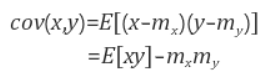

>>(단, mx는 x의 평균, my는 y의 평균, E[]는 기대값(평균).)

> - x의 분산은 x들이 평균을 중심으로 얼마나 흩어져 있는지를 나타내고, x와 y의 공분산은 x, y의 흩어진 정도가 얼마나 서로 상관관계를 가지고 흩어졌는지를 나타냄

> - 공분산 행렬

>>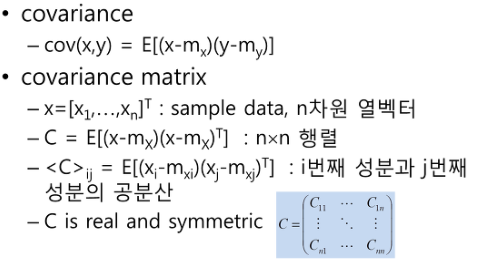

> - PCA를 입력 데이터들의 공분산 행렬(covariance matrix)에 대한 고유값분해(eigendecomposition)로 볼 수 있음, 이 때 나오는 고유벡터가 주성분 벡터로서 데이터의 분포에서 분산이 큰 방향을 나타내고, 대응되는 고유값(eigenvalue)이 그 분산의 크기를 나타낸다.

> 2) PCA계산

>> 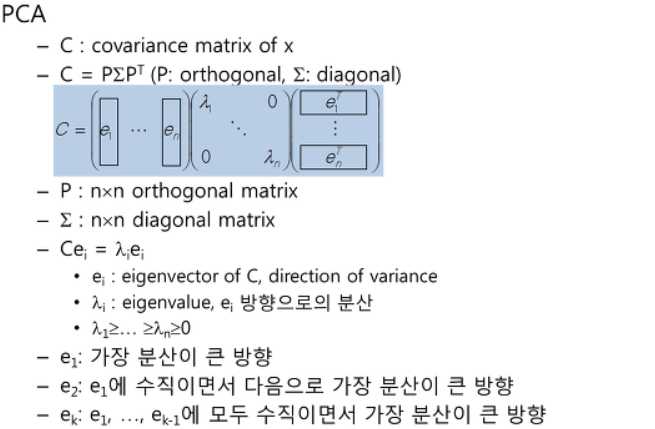

**과정 요약**

: 데이터 집합에 대해 공분산 행렬 구함

: 공분산 행렬에서 고유값과 고유벡터 구함

: 고유값 목록에서 값이 높은 K개 인덱스 구함

# **데이터를 이용한 PCA 구하기**

In [0]:
import numpy as np
from numpy import linalg as la

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

print('X.shape:', X.shape)

X.shape: (60, 3)


In [0]:
X_cen = X - X.mean(axis=0)
X_cov = np.dot(X_cen.T, X_cen) / 59
print(X_cov)

# np.cov()를 이용해 구할 수도 있다.
# print(np.cov(X_cen.T))

[[0.69812855 0.17640539 0.12137931]
 [0.17640539 0.1801727  0.07253614]
 [0.12137931 0.07253614 0.04552382]]


In [0]:
w, v = np.linalg.eig(X_cov)

print('eigenvalue :', w)
print('eigenvector :\n', v)

eigenvalue : [0.77830975 0.1351726  0.01034272]
eigenvector :
 [[ 0.93636116  0.34027485 -0.08626012]
 [ 0.29854881 -0.90119108 -0.31420255]
 [ 0.18465208 -0.2684542   0.94542898]]


In [0]:
print('explained variance ratio :', w / w.sum())

explained variance ratio : [0.84248607 0.14631839 0.01119554]


# **SVD를 이용한 PCA 구하기**

In [0]:
U, D, V_t = np.linalg.svd(X_cen)

print('singular value :', D)
print('singular vector :\n', V_t.T)

singular value : [6.77645005 2.82403671 0.78116597]
singular vector :
 [[ 0.93636116 -0.34027485 -0.08626012]
 [ 0.29854881  0.90119108 -0.31420255]
 [ 0.18465208  0.2684542   0.94542898]]


In [0]:
print('explained variance ratio :', D ** 2 / np.sum(D**2))

explained variance ratio : [0.84248607 0.14631839 0.01119554]


**출처**

https://www.slideshare.net/madvirus/pca-svd

https://excelsior-cjh.tistory.com/167

https://darkpgmr.tistory.com/110

https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/04/06/pcasvdlsa/

https://datascienceschool.net/view-notebook/30055dc68e8f4db0b7f6e4b56a571d52/